# Task 1: XOR

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (1, 0)_, ground truth _(g1, g2) = (1, 1), h0 = 0, (wx, wh, b1, w, b2) = (1, 1, 1, 1, 1)_, compute _(dwx, dwh, db1, dw, db2)_, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: Enter your derivations and the computational process]**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

Given values are $w = 1$, $wx = 1$, $wh = 1$, $b_1 = 1$, $b_2 = 1$ and from this we know that,  
$h_0 = 0$, $h_1 = 0.880$, $h_2 = 0.867$, $y_1 = 0.867$, $y_2 = 0.866$  

We know that, $$\mathbf{L = (g_1 - y_1)^2 + (g_2 - y_2)^2}$$   
Calculating $\mathbf{\dfrac{dL}{dw}}$:    
$\dfrac{dL}{dy_1} = -2(g_1 - y_1) = -2(1-0.867) = -0.266$ and $\dfrac{dL}{dy_2} = -2(g_2 - y_2) = -2(1-0.866) = -0.268$  
$\dfrac{dy_1}{dw} = \dfrac{dy_1}{d(wh_1 + b_2)}\dfrac{d(wh_1+b_2)}{dw} = \sigma(wh_1+b_2)[1 - \sigma(wh_1+b_2)]h_1 = 0.115 \times 0.880 = 0.101$  
$\dfrac{dy_2}{dw} = \dfrac{dy_2}{d(wh_2 + b_2)}\dfrac{d(wh_2+b_2)}{dw} = \sigma(wh_2+b_2)[1 - \sigma(wh_2+b_2)]h_2 = 0.116 \times 0.867 = 0.100$  

Therefore, $\dfrac{dL}{dw} = \dfrac{dL}{dy_1}\dfrac{dy_1}{dw} + \dfrac{dL}{dy_2}\dfrac{dy_2}{dw} = -0.266 \times 0.101 -0.268 \times 0.100 = \boxed{\mathbf{-0.053}}$  

*Calculating* $\mathbf{\dfrac{dL}{db_2}}$:  
$\dfrac{dy_1}{db_2} = \dfrac{dy_1}{d(wh_1+b_2)}\dfrac{d(wh_1+b_2)}{db_2} = \sigma(wh_1+b_2)[1 - \sigma(wh_1+b_2)] = 0.115$  
$\dfrac{dy_2}{db_2} = \dfrac{dy_2}{d(wh_2+b_2)}\dfrac{d(wh_2+b_2)}{db_2} = \sigma(wh_2+b_2)[1 - \sigma(wh_2+b_2)] = 0.116$  
Therefore, $\dfrac{dL}{db_2} = \dfrac{dL}{dy_1}\dfrac{dy_1}{db_2} + \dfrac{dL}{dy_2}\dfrac{dy_2}{db_2} = -0.266 \times 0.115 - 0.268 \times 0.116 = \boxed{\mathbf{-0.06}}$  

Calculating $\mathbf{\dfrac{dL}{db_1}}$:  
$\dfrac{dy_1}{dh_1} = \dfrac{dy_1}{d(wh_1+b_2)}\dfrac{d(wh_1+b_2)}{dh_1} = \sigma(wh_1+b_2)[1 - \sigma(wh_1+b_2)]w = 0.115$  
$\dfrac{dy_2}{dh_2} = \dfrac{dy_2}{d(wh_2+b_2)}\dfrac{d(wh_2+b_2)}{dh_2} = \sigma(wh_2+b_2)[1 - \sigma(wh_2+b_2)]w = 0.116$  
Therefore, $\dfrac{dL}{db_1} = \dfrac{dL}{dy_1}\dfrac{dy_1}{dh_1}\dfrac{dh_1}{db_1} + \dfrac{dL}{dy_2}\dfrac{dy_2}{dh_2}\dfrac{dh_2}{db_1} = -0.266 \times 0.115 \times 0.106 - 0.268 \times 0.116 \times 0.115 = \boxed{\mathbf{-6.8 \times 10^{-3}}}$  


Calculating $\mathbf{\dfrac{dL}{dw_x}}$:  
$\dfrac{dh_1}{dw_x} = \dfrac{dh_1}{d(w_xx + w_hh_0+b_1)}\dfrac{d(w_xx + w_hh_0+b_1)}{dw_x} = \sigma(w_xx+w_hh_0+b_1)[1-\sigma(w_xx+w_hh_0+b_1)]x_1 = \sigma(2)[1-\sigma(2)]1 = 0.1056$  
$\dfrac{dh_2}{dw_x} = \dfrac{dh_2}{d(w_xx + w_hh_1+b_1)}\dfrac{d(w_xx + w_hh_1+b_1)}{dw_x} = \sigma(w_xx+w_hh_1+b_1)[1-\sigma(w_xx+w_hh_1+b_1)]x_1 = \sigma(1.88)[1-\sigma(1.88)]0 = 0$  
Therefore, $\dfrac{dL}{dw_x} = \dfrac{dL}{dy_1}\dfrac{dy_1}{dh_1}\dfrac{dh_1}{dw_x} + \dfrac{dL}{dy_2}\dfrac{dy_2}{dh_2}\dfrac{dh_2}{dw_x} = (-0.268\times0.115\times0.1056) + (0) = \boxed{\mathbf{-3.25 \times 10^{-3}}}$  

Calculating $\mathbf{\dfrac{dL}{dw_h}}$:  
$\dfrac{dh_1}{dw_h} = \dfrac{dh_1}{d(w_xx+w_hh_0+b_1)}\dfrac{d(w_xx+w_hh_0+b_1)}{dw_h} = \sigma(w_xx+w_hh_0+b_1)[1-\sigma(w_xx+w_hh_0+b_1)]h_0 = \sigma(2)[1-\sigma(2)]0 = 0$  
$\dfrac{dh_2}{dw_h} = \dfrac{dh_2}{d(w_xx+w_hh_1+b_1)}\dfrac{d(w_xx+w_hh_1+b_1)}{dw_h} = \sigma(w_xx+w_hh_1+b_1)[1-\sigma(w_xx+w_hh_1+b_1)]h_1 = \sigma(2)[1-\sigma(2)]0.880 = 0.101$  
Therefore, $\dfrac{dL}{dw_h} = \dfrac{dL}{dy_1}\dfrac{dy_1}{dh_1}\dfrac{dh_1}{dw_h} + \dfrac{dL}{dy_2}\dfrac{dy_2}{dh_2}\dfrac{dh_2}{dw_h} = (-0.268\times0.115\times0) + (-0.268\times0.116\times0.101) = \boxed{\mathbf{-3.14\times10^{-3}}}$

## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the GRU. Please read the source code for more information.

In [2]:
from ecbm4040.xor.utils import create_dataset

### Build a network using a Tensorlow GRUCell
This section shows an example how to build a RNN network using an GRU cell. GRU cell is an inbuilt class in tensorflow which implements the real behavior of the GRU neuron. 

Reference: 
1. [TensorFlow GRU cell](https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/contrib/rnn/GRUCell)
2. [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

In [3]:
from tensorflow.contrib.rnn import GRUCell

In [4]:
tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# define GRU cell
num_units = 64
cell = GRUCell(num_units)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

epoch 1: train cost = 0.1557406783103943
epoch 2: train cost = 0.0007563960389234126
epoch 3: train cost = 0.0003649348800536245
epoch 4: train cost = 0.00027643999783322215
epoch 5: train cost = 0.0002218203735537827
epoch 6: train cost = 0.00018143725174013525
epoch 7: train cost = 0.00015095573326107115
epoch 8: train cost = 0.00012768972374033183
epoch 9: train cost = 0.00010968292917823419
epoch 10: train cost = 9.54058050410822e-05
epoch 11: train cost = 8.382713713217527e-05
epoch 12: train cost = 7.425889634760097e-05
epoch 13: train cost = 6.625335663557053e-05
epoch 14: train cost = 5.9476915339473635e-05
epoch 15: train cost = 5.367817357182503e-05
epoch 16: train cost = 4.868188625550829e-05
epoch 17: train cost = 4.434098082128912e-05
epoch 18: train cost = 4.0532373532187194e-05
epoch 19: train cost = 3.7187939597060904e-05
epoch 20: train cost = 3.42200328304898e-05


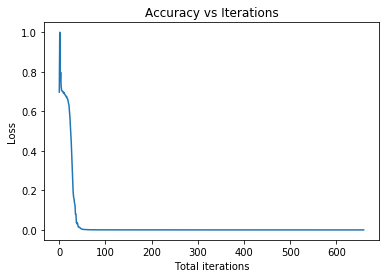

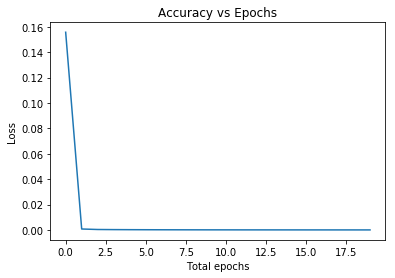

In [5]:
X_train,y_train=create_dataset(10000)
init = tf.global_variables_initializer()


batch_size_m = 300
num_batch_m = X_train.shape[0]//batch_size_m
epochs=20
train_cost_li=[]
train_cost_li_ep=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(epochs):
        for i in range(num_batch_m):
            X_batch_m, y_batch_m = X_train[i*batch_size_m:(i+1)*batch_size_m,:,:], y_train[i*batch_size_m:(i+1)*batch_size_m,:]
            _,train_cost=sess.run([optimizer,loss], feed_dict={input_data: X_batch_m, output_data: y_batch_m})
            train_cost_li.append(train_cost)
        train_cost_li_ep.append(train_cost)
        print('epoch {}: train cost = {}'.format(e+1, train_cost))
    
plt.plot(train_cost_li)
plt.title("Accuracy vs Iterations")
plt.xlabel("Total iterations")
plt.ylabel("Loss")
plt.show()  

plt.plot(train_cost_li_ep)
plt.title("Accuracy vs Epochs")
plt.xlabel("Total epochs")
plt.ylabel("Loss")
plt.show()

## Task 1, Part 3 :  Build your own GRUCell
In this part, you need to build your own GRU cell to achieve the GRU functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyGRUCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [6]:
from ecbm4040.xor.rnn import MyGRUCell

In [7]:
# recreate xor netowrk with your own GRU cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own GRU cell
num_units = 64
cell = GRUCell(num_units)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

epoch 1: train cost = 0.670714795589447
epoch 2: train cost = 0.001416861778125167
epoch 3: train cost = 0.00025896451552398503
epoch 4: train cost = 0.0001842555357143283
epoch 5: train cost = 0.0001471057184971869
epoch 6: train cost = 0.00012041055015288293
epoch 7: train cost = 0.0001004489604383707
epoch 8: train cost = 8.517823880538344e-05
epoch 9: train cost = 7.320813892874867e-05
epoch 10: train cost = 6.36661789030768e-05
epoch 11: train cost = 5.5909709772095084e-05
epoch 12: train cost = 4.950682705384679e-05
epoch 13: train cost = 4.418154276208952e-05
epoch 14: train cost = 3.9674767322139814e-05
epoch 15: train cost = 3.585221929824911e-05
epoch 16: train cost = 3.2557902159169316e-05
epoch 17: train cost = 2.969877459690906e-05
epoch 18: train cost = 2.722460158111062e-05
epoch 19: train cost = 2.504272197256796e-05
epoch 20: train cost = 2.3119915567804128e-05


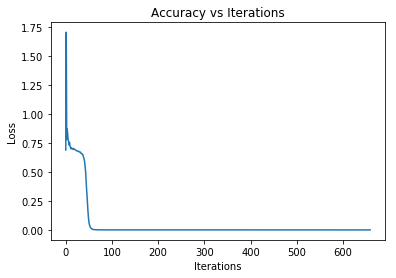

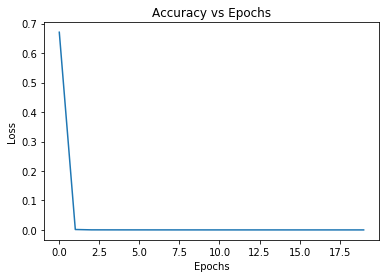

In [8]:
X_train,y_train=create_dataset(10000)
init = tf.global_variables_initializer()


batch_size_m = 300
num_batch_m = X_train.shape[0]//batch_size_m
epochs=20
train_cost_li=[]
train_cost_li_ep=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(epochs):
        for i in range(num_batch_m):
            X_batch_m, y_batch_m = X_train[i*batch_size_m:(i+1)*batch_size_m,:,:], y_train[i*batch_size_m:(i+1)*batch_size_m,:]
            _,train_cost=sess.run([optimizer,loss], feed_dict={input_data: X_batch_m, output_data: y_batch_m})
            train_cost_li.append(train_cost)
        train_cost_li_ep.append(train_cost)
        print('epoch {}: train cost = {}'.format(e+1, train_cost))
    
plt.plot(train_cost_li)
plt.title("Accuracy vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()  

plt.plot(train_cost_li_ep)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()